# Feature engineering
## Examining the data
First, we'll take a look at the data that we're working with

In [1]:
import pandas as pd

df = pd.read_csv("../data/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


So we have 1460 samples, with 81 columns. The goal is to predict the last column, `SalePrice`.

## Processing the features for regression
This process will include:
1. Isolating the numerical features, setting any `NaN` cells to 0.
2. Isolating the categorical features, and encoding with `OneHotEncoder`.
3. Isolating ordinal categorical features, and encoding with `OrdinalEncoder`.

In [2]:
# first layer - split by datatype
num_df = df.select_dtypes(exclude='object')
cat_df = df.select_dtypes(include='object')
num_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [3]:
cat_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Processing numerical features
There are many features in the numerical dataset that are actually categorical by nature, like `YearBuilt`. We will manually examine and justify each feature we deem categorical in this set, and perform one-hot encoding.

In [4]:
num_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

- `Id`: this is a useless feature, as a house's internal identifying number doesn't determine its price -- this will later be removed.
- `MSSubClass`: this is an identifier for the type of dwelling involved in the sale. Since it's an identifier, it should be a categorical feature.
- `YearBuilt`: this identifies the year the house was built; it should be a categorical feature.
- `YearRemodAdd`: same as `YearRebuilt`.
- `BsmtFullBath`: because this is a binary feature (1 or 0), it's already technically one-hot encoded.
- `BsmtHalfBath`: same as `BsmtFullBath`.
- `GarageYrBlt`: this identifies the year the garage was built -- should be categorical.
- `MoSold`: this identifies the month the house was sold -- should be categorical.
- `YrSold`: same as MoSold, except with year instead of month.

In [5]:
# drop useless features
num_df.drop('Id', axis=1, inplace=True)

# drop categorical features
extracted_cat_features = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 
                          'BsmtHalfBath', 'GarageYrBlt', 'MoSold', 'YrSold']
num_df.drop(extracted_cat_features, axis=1, inplace=True)

num_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,3,836,192,84,0,0,0,0,0,250000


Next, we'll identify any columns that contain `NaN` values. These values should be converted to 0.

In [6]:
# convert nan cells to 0
print(num_df.columns[num_df.isna().any()])
num_df.fillna(0, inplace=True)
print(num_df.columns[num_df.isna().any()])

Index(['LotFrontage', 'MasVnrArea'], dtype='object')
Index([], dtype='object')


Now, `num_df` should be ready for training.

### Processing categorical features
Some data is categorical, but an inherent order is implied; such as small, medium, and large. This type of feature engineering is called *ordinal encoding*.

In [7]:
# add dropped categorical features from the numerical df to the categorical df
cat_df = pd.concat([cat_df, df[extracted_cat_features]], axis=1)
cat_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,SaleType,SaleCondition,MSSubClass,YearBuilt,YearRemodAdd,BsmtFullBath,BsmtHalfBath,GarageYrBlt,MoSold,YrSold
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,WD,Normal,60,2003,2003,1,0,2003.0,2,2008
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,WD,Normal,20,1976,1976,0,1,1976.0,5,2007
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,WD,Normal,60,2001,2002,1,0,2001.0,9,2008
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,WD,Abnorml,70,1915,1970,1,0,1998.0,2,2006
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,WD,Normal,60,2000,2000,1,0,2000.0,12,2008


In [8]:
cat_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass', 'YearBuilt', 'YearRemodAdd',
       'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'MoSold', 'YrSold'],
      dtype='object')

Here, we identify the categories that are inherently ordinal, and should be converted.
- `LandSlope`
- `BsmtQual`
- `BsmtCond`
- `BsmtFinType1`
- `BsmtFinType2`
- `HeatingQC`
- `Electrical`
- `KitchenQual`
- `Functional`
- `FireplaceQu`
- `GarageQual`
- `GarageCond`
- `PoolQC`
One caveat is that for some of these like `GarageQual`, while the data is inherently ordinal, there are also values like `NaN` for homes without garages. So a home without a garage may not necessarily be worse than a home with a bad quality garage.

In [9]:
extracted_ord_features = ['LandSlope', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 
                          'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
                          'GarageQual', 'GarageCond', 'PoolQC']
cat_df.drop(extracted_ord_features, axis=1, inplace=True)
cat_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,...,SaleType,SaleCondition,MSSubClass,YearBuilt,YearRemodAdd,BsmtFullBath,BsmtHalfBath,GarageYrBlt,MoSold,YrSold
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,CollgCr,Norm,Norm,...,WD,Normal,60,2003,2003,1,0,2003.0,2,2008
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Veenker,Feedr,Norm,...,WD,Normal,20,1976,1976,0,1,1976.0,5,2007
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,CollgCr,Norm,Norm,...,WD,Normal,60,2001,2002,1,0,2001.0,9,2008
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Crawfor,Norm,Norm,...,WD,Abnorml,70,1915,1970,1,0,1998.0,2,2006
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,NoRidge,Norm,Norm,...,WD,Normal,60,2000,2000,1,0,2000.0,12,2008


Now, we'll use one-hot encoding to encode these categorical features into numeric features.

In [10]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False)
enc.set_output(transform='pandas')
encoded_cat_df = enc.fit_transform(cat_df)
encoded_cat_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_nan,...,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1456,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1458,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Now, `cat_df` should be ready for training.

### Processing ordinal features
Now, all that's left is to convert the remaining categorical features into ordinal features.

In [11]:
extracted_ord_features

['LandSlope',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PoolQC']

In [12]:
ord_df = df[extracted_ord_features]
ord_df

,LandSlope,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PoolQC
0,Gtl,Gd,TA,GLQ,Unf,Ex,SBrkr,Gd,Typ,NaN,TA,TA,NaN
1,Gtl,Gd,TA,ALQ,Unf,Ex,SBrkr,TA,Typ,TA,TA,TA,NaN
2,Gtl,Gd,TA,GLQ,Unf,Ex,SBrkr,Gd,Typ,TA,TA,TA,NaN
3,Gtl,TA,Gd,ALQ,Unf,Gd,SBrkr,Gd,Typ,Gd,TA,TA,NaN
4,Gtl,Gd,TA,GLQ,Unf,Ex,SBrkr,Gd,Typ,TA,TA,TA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Gtl,Gd,TA,Unf,Unf,Ex,SBrkr,TA,Typ,TA,TA,TA,NaN
1456,Gtl,Gd,TA,ALQ,Rec,TA,SBrkr,TA,Min1,TA,TA,TA,NaN
1457,Gtl,TA,Gd,GLQ,Unf,Ex,SBrkr,Gd,Typ,Gd,TA,TA,NaN
1458,Gtl,TA,TA,GLQ,Rec,Gd,FuseA,Gd,Typ,NaN,TA,TA,NaN


In [13]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(encoded_missing_value=-1)
enc.set_output(transform='pandas')
encoded_ord_df = enc.fit_transform(ord_df)
enc.categories_

[array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'TA', nan], dtype=object),
 array(['Fa', 'Gd', 'Po', 'TA', nan], dtype=object),
 array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf', nan], dtype=object),
 array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf', nan], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr', nan], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object),
 array(['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev', 'Typ'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA', nan], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA', nan], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA', nan], dtype=object),
 array(['Ex', 'Fa', 'Gd', nan], dtype=object)]

Here, the values are encoded such that values that are smaller are good, while values that are larger are bad. We've currently decided to encode `NaN` values as -1.

In [14]:
encoded_ord_df

,LandSlope,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PoolQC
0,0.0,2.0,3.0,2.0,5.0,0.0,4.0,2.0,6.0,-1.0,4.0,4.0,-1.0
1,0.0,2.0,3.0,0.0,5.0,0.0,4.0,3.0,6.0,4.0,4.0,4.0,-1.0
2,0.0,2.0,3.0,2.0,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,-1.0
3,0.0,3.0,1.0,0.0,5.0,2.0,4.0,2.0,6.0,2.0,4.0,4.0,-1.0
4,0.0,2.0,3.0,2.0,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,2.0,3.0,5.0,5.0,0.0,4.0,3.0,6.0,4.0,4.0,4.0,-1.0
1456,0.0,2.0,3.0,0.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,-1.0
1457,0.0,3.0,1.0,2.0,5.0,0.0,4.0,2.0,6.0,2.0,4.0,4.0,-1.0
1458,0.0,3.0,3.0,2.0,4.0,2.0,0.0,2.0,6.0,-1.0,4.0,4.0,-1.0


## Checkpoint -- finalizing the training set
We now have three dataframes -- `num_df`, `encoded_cat_df`, and `encoded_ord_df`. We'll now combine these three, moving the target column at the end.

In [15]:
print(num_df.shape, encoded_cat_df.shape, encoded_ord_df.shape)

(1460, 29) (1460, 506) (1460, 13)


In [16]:
target_col = num_df["SalePrice"]
num_df.drop("SalePrice", axis=1, inplace=True)
target_col

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [17]:
train_df = pd.concat([num_df, encoded_cat_df, encoded_ord_df, target_col], axis=1)
train_df

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PoolQC,SalePrice
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,5.0,0.0,4.0,2.0,6.0,-1.0,4.0,4.0,-1.0,208500
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,5.0,0.0,4.0,3.0,6.0,4.0,4.0,4.0,-1.0,181500
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,-1.0,223500
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,5.0,2.0,4.0,2.0,6.0,2.0,4.0,4.0,-1.0,140000
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,-1.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,0.0,0,0,953,953,953,...,5.0,0.0,4.0,3.0,6.0,4.0,4.0,4.0,-1.0,175000
1456,85.0,13175,6,6,119.0,790,163,589,1542,2073,...,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,-1.0,210000
1457,66.0,9042,7,9,0.0,275,0,877,1152,1188,...,5.0,0.0,4.0,2.0,6.0,2.0,4.0,4.0,-1.0,266500
1458,68.0,9717,5,6,0.0,49,1029,0,1078,1078,...,4.0,2.0,0.0,2.0,6.0,-1.0,4.0,4.0,-1.0,142125


# Principal Component Analysis
Now, we'll apply PCA to reduce the number of dimensions to the data.

Pipeline:
- Scale data
- Run PCA, with >95% explained variance
- Examine transformed dataset
## Why use PCA?
Aureilien Geron, "Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow", 2019
- Speeds up training time
- If you reduce down to 2 dimensions, you can visualize your data
- Can, in some cases, improve performance
## High level explanation of PCA
While high dimensions make for sparse data, real world data is actually usually not spread out uniformly across all dimensions.
- Some features are almost constant
- Many features can be highly correlated

The result is that training instances lie within or close to a lower dimensional subspace of the high dimensional space.

>Consider a visual model of the orbits of the planets around the sun. It may seem like we would need a 3D space to model something like this, but the reality is that the most of the planets orbit around the sun in a relatively flat ellipse; only about 3 degrees of variance. This means that a model of the planets' orbit around the sun can just be *squished* down to 2D without losing much information -- a lower dimensional subspace of the 3D space.

If this space is in 3D, then the subspace is a plane in 2D with two new features, $z_1$ and $z_2$ that act as coordinates of the projections onto the plane (points are projected orthogonally onto the plane).

PCA is effectively used to "squish" the data into lower dimesions, while trying to preserve as much variance as possible (as we learned, variance = information by Shannon entropy).

## Scale the data

In [18]:
from sklearn.preprocessing import StandardScaler

print(train_df.shape)
y = train_df['SalePrice']
X = train_df.drop('SalePrice', axis=1)
print(X.shape, y.shape)

scaler = StandardScaler().set_output(transform="pandas")
X_scaled = scaler.fit_transform(X)
X_scaled

(1460, 548)
(1460, 547) (1460,)


,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PoolQC
0,0.212877,-0.207142,0.651479,-0.517200,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,...,-0.336488,0.339853,-0.884658,0.303616,-0.409369,0.255978,-0.966583,0.321389,0.302084,-0.064673
1,0.645747,-0.091886,-0.071836,2.179628,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,...,-1.391854,0.339853,-0.884658,0.303616,0.795629,0.255978,1.487697,0.321389,0.302084,-0.064673
2,0.299451,0.073480,0.651479,-0.517200,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,...,-0.336488,0.339853,-0.884658,0.303616,-0.409369,0.255978,1.487697,0.321389,0.302084,-0.064673
3,0.068587,-0.096897,0.651479,-0.517200,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,...,-1.391854,0.339853,0.265476,0.303616,-0.409369,0.255978,0.505985,0.321389,0.302084,-0.064673
4,0.761179,0.375148,1.374795,-0.517200,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,...,-0.336488,0.339853,-0.884658,0.303616,-0.409369,0.255978,1.487697,0.321389,0.302084,-0.064673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.126303,-0.260560,-0.071836,-0.517200,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,...,1.246560,0.339853,-0.884658,0.303616,0.795629,0.255978,1.487697,0.321389,0.302084,-0.064673
1456,0.790037,0.266407,-0.071836,0.381743,0.087911,0.759659,0.722112,0.049262,1.104925,2.355701,...,-1.391854,-0.431819,1.415610,0.303616,0.795629,-3.828474,1.487697,0.321389,0.302084,-0.064673
1457,0.241735,-0.147810,0.651479,3.078570,-0.570750,-0.369871,-0.288653,0.701265,0.215641,0.065656,...,-0.336488,0.339853,-0.884658,0.303616,-0.409369,0.255978,0.505985,0.321389,0.302084,-0.064673
1458,0.299451,-0.080160,-0.795151,0.381743,-0.570750,-0.865548,6.092188,-1.284176,0.046905,-0.218982,...,-0.336488,-0.431819,0.265476,-3.477021,-0.409369,0.255978,-0.966583,0.321389,0.302084,-0.064673


## Perform PCA 
With the goal of an explained variance ratio cumulative sum of 95%

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_scaled_pca = pca.fit_transform(X_scaled)

print(f'{pca.explained_variance_ratio_[:5]} ... {pca.explained_variance_ratio_[-5:]}')
print(f'Number of features: {len(pca.explained_variance_ratio_)}')
print(f'Explained variance ratio: {pca.explained_variance_ratio_.sum()}')

[0.03177932 0.0182005  0.01351974 0.01284642 0.01144591] ... [0.00068797 0.00068362 0.00068122 0.00067994 0.00066814]
Number of features: 318
Explained variance ratio: 0.9505530826929818


This means we can reduce the feature set from 547 to 318, while keeping 95% of the variance contained in the data.

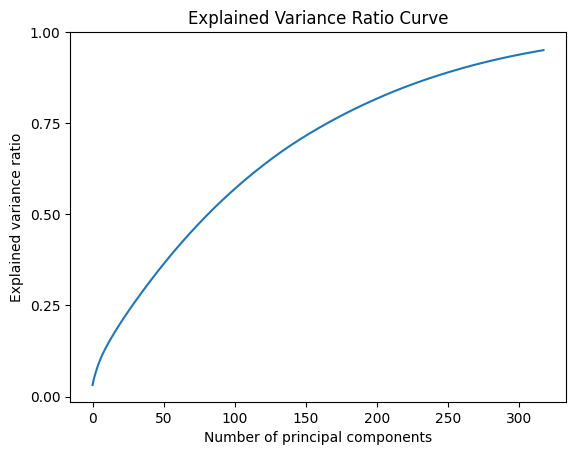

In [20]:
import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance ratio')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.title('Explained Variance Ratio Curve')
plt.show()

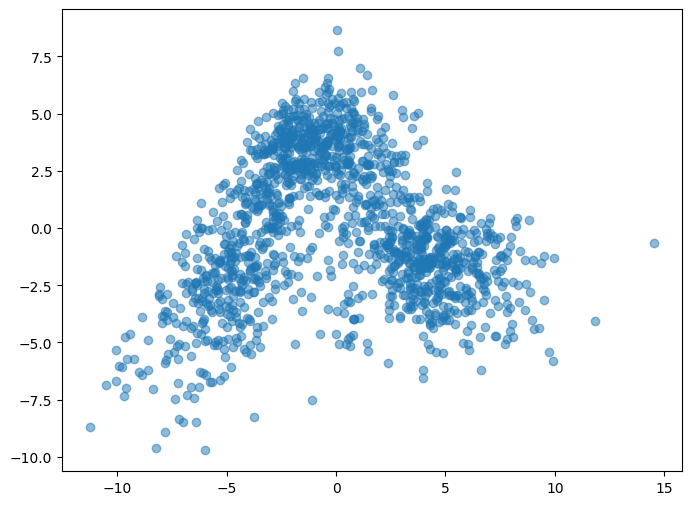

In [21]:
# plot first pca
plt.figure(figsize=(8,6))
plt.scatter(X_scaled_pca[:,0], X_scaled_pca[:,1], alpha=0.5)
plt.show()

# Performance Analysis
Here, we'll perform linear regression with the engineered data alone, then with PCA.
## Performance with engineered data
Pipeline:
- Engineer the features
- Scale the data
- Perform linear regression
- Use 10-fold cross validation
- Used normalized root mean squared error as our performance metric

In [22]:
import pandas as pd
from data_processor import process_for_regression

# read and process data
df = process_for_regression(pd.read_csv('../data/train.csv'))
display(df.head())

# split data from target column
target_col = 'SalePrice'
y = df[target_col]
X = df.drop(target_col, axis=1)
display(X, y)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PoolQC,SalePrice
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,5.0,0.0,4.0,2.0,6.0,-1.0,4.0,4.0,-1.0,208500
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,5.0,0.0,4.0,3.0,6.0,4.0,4.0,4.0,-1.0,181500
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,-1.0,223500
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,5.0,2.0,4.0,2.0,6.0,2.0,4.0,4.0,-1.0,140000
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,-1.0,250000


,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PoolQC
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,2.0,5.0,0.0,4.0,2.0,6.0,-1.0,4.0,4.0,-1.0
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,0.0,5.0,0.0,4.0,3.0,6.0,4.0,4.0,4.0,-1.0
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,2.0,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,-1.0
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,0.0,5.0,2.0,4.0,2.0,6.0,2.0,4.0,4.0,-1.0
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,2.0,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,0.0,0,0,953,953,953,...,5.0,5.0,0.0,4.0,3.0,6.0,4.0,4.0,4.0,-1.0
1456,85.0,13175,6,6,119.0,790,163,589,1542,2073,...,0.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,-1.0
1457,66.0,9042,7,9,0.0,275,0,877,1152,1188,...,2.0,5.0,0.0,4.0,2.0,6.0,2.0,4.0,4.0,-1.0
1458,68.0,9717,5,6,0.0,49,1029,0,1078,1078,...,2.0,4.0,2.0,0.0,2.0,6.0,-1.0,4.0,4.0,-1.0


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [23]:
# analysis with linear regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# scale
scaler = StandardScaler().set_output(transform='pandas')
X_scaled = scaler.fit_transform(X)

# train
regr = LinearRegression()
regr.fit(X_scaled, y)

# examine coefficients
print(regr.intercept_)
print(regr.coef_)

180824.80431027384
[ 5.02820644e+02  4.49117568e+03  8.95749172e+03  6.75173310e+03
  3.71329851e+03 -6.06827961e+15 -2.14631561e+15 -5.87893764e+15
  5.83687288e+15 -1.05399156e+16 -1.19014972e+16 -1.32565813e+15
  1.43266802e+16  2.02956901e+03  6.06731157e+02 -4.67924984e+03
 -2.01120230e+03  4.82298055e+03  3.21738418e+03  5.07822121e+03
  2.20234405e+03  2.09200515e+03  2.42368686e+02  9.95110838e+02
  1.10183275e+03  2.09754319e+03  1.24161511e+04 -6.96143112e+02
 -3.95250032e+14 -9.88397628e+14 -4.98920674e+14 -1.95751372e+15
 -1.70795710e+15 -8.36055901e+16 -8.36055901e+16 -2.69397515e+16
 -2.44727150e+16 -3.58114121e+16  3.85766794e+15  1.35381829e+15
  6.75867018e+14  3.94843515e+15  8.20789208e+16  7.34611493e+16
  6.26425466e+16  1.22280622e+17  1.07628544e+17  1.07628544e+17
  4.84236837e+16  3.09258860e+16  2.22409270e+16  6.58633108e+15
  5.65419557e+16  9.08358328e+14  3.13179507e+14  8.81542315e+14
  1.65381749e+15  1.16131517e+15  2.57087436e+15  1.55467695e+15
  2.13

In [24]:
# largest positive and negative correlations
import numpy as np

max_val, min_val = regr.coef_.max(), regr.coef_.min()
# finds first value that matches that max/min value in the list. output is a list of those indices
max_val_idx, min_val_idx = np.where(regr.coef_ == max_val)[0], np.where(regr.coef_ == min_val)[0]

print(regr.coef_[max_val_idx], regr.coef_[min_val_idx])
print(df.columns[max_val_idx[0]], df.columns[min_val_idx[0]])

[1.59569948e+17] [-1.5761286e+17]
Exterior2nd_CBlock Exterior1st_CBlock


In [25]:
# proper training pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

regr = make_pipeline(StandardScaler(), LinearRegression())
neg_rmse_list = cross_val_score(regr, X, y, cv=10, scoring='neg_root_mean_squared_error')
neg_rmse_list

array([-3.13339178e+15, -7.60505715e+16, -1.03335004e+17, -1.79975299e+15,
       -2.62901767e+16, -1.71701370e+17, -6.90075391e+16, -5.10106490e+14,
       -6.63313669e+16, -3.32165430e+16])

In [26]:
# calculate average rmse
rmse = -neg_rmse_list.mean()
rmse

np.float64(5.513758225059792e+16)

In [27]:
# normalized
rmse / y.mean()

np.float64(304760213303.0134)

## Performance with engineered data and PCA

In [28]:
display(X, y)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PoolQC
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,2.0,5.0,0.0,4.0,2.0,6.0,-1.0,4.0,4.0,-1.0
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,0.0,5.0,0.0,4.0,3.0,6.0,4.0,4.0,4.0,-1.0
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,2.0,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,-1.0
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,0.0,5.0,2.0,4.0,2.0,6.0,2.0,4.0,4.0,-1.0
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,2.0,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,0.0,0,0,953,953,953,...,5.0,5.0,0.0,4.0,3.0,6.0,4.0,4.0,4.0,-1.0
1456,85.0,13175,6,6,119.0,790,163,589,1542,2073,...,0.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,-1.0
1457,66.0,9042,7,9,0.0,275,0,877,1152,1188,...,2.0,5.0,0.0,4.0,2.0,6.0,2.0,4.0,4.0,-1.0
1458,68.0,9717,5,6,0.0,49,1029,0,1078,1078,...,2.0,4.0,2.0,0.0,2.0,6.0,-1.0,4.0,4.0,-1.0


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [29]:
regr = make_pipeline(StandardScaler(), PCA(n_components=0.95), LinearRegression())
regr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('linearregression', LinearRegression())])

In [30]:
from sklearn.model_selection import cross_validate
neg_rmse_list = cross_val_score(regr, X, y, cv=10, scoring='neg_root_mean_squared_error')
scoring={'neg_rmse': 'neg_root_mean_squared_error', 
         'neg_mape': 'neg_mean_absolute_percentage_error'}
scores = cross_validate(regr, X, y, scoring=scoring, cv=10, return_train_score=True)
print(scores.keys())


dict_keys(['fit_time', 'score_time', 'test_neg_rmse', 'train_neg_rmse', 'test_neg_mape', 'train_neg_mape'])


In [31]:
scores['test_neg_rmse'], scores['test_neg_mape']

(array([-24612.71323004, -28521.39669945, -30597.35869177, -40499.14034118,
        -33985.57304167, -35542.84808322, -27140.23717713, -30783.49224714,
        -62662.36712938, -22553.14881645]),
 array([-0.12991634, -0.11857696, -0.12723864, -0.14408678, -0.13367778,
        -0.12801338, -0.11413107, -0.12967536, -0.13813605, -0.10223082]))

In [32]:
# interpret rmse scores
rmse = -scores['test_neg_rmse'].mean()
nrmse = rmse / y.mean()
percent_nrmse = f'{round(nrmse * 100, 1)}%'

# interpret mape scores
mape = -scores['test_neg_mape'].mean()
percent_mape = f'{round(mape * 100, 1)}%'

f'normalized rmse: {percent_nrmse}, mape: {percent_mape}'

'normalized rmse: 18.6%, mape: 12.7%'

## Analysis
- too many features; or a lot of useless features that distract the line?
- Or is the choice in feature engineering where the mistake was?

Engineered feature set:
5.51 x 10^16 = 50 000 000 000 000 000
or 30 476 021 330 301 % error

So that's 50 quadrillion, that's hilarious.

PCA, reduced feature set:
33 689
or 18.62% error